In [7]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20241129.csv")
df.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,30/08/2024,16436,10705,225,19026,3925,59.0
1,15/09/2023,15499,10671,267,18421,4519,61.0
2,28/12/2021,1756,2352,0,3775,0,13.0
3,11/01/2023,10536,8347,223,14072,0,48.0
4,11/09/2021,820,612,0,1283,0,11.0


General insights about dataset

In [3]:
df.describe()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
count,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1898.000000
mean,9891.395203,7195.446298,179.581335,12597.213243,2352.694995,43.390411
std,6120.715714,3345.616428,156.532738,6720.494557,2494.766306,41.746882
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3044.500000,4463.500000,0.000000,6383.000000,0.000000,14.000000
50%,11417.000000,7507.000000,193.000000,13106.500000,567.500000,40.000000
75%,15517.500000,10008.250000,313.750000,17924.750000,4914.000000,68.000000
max,21070.000000,15154.000000,1029.000000,28678.000000,7255.000000,1105.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1918 non-null   object 
 1   Local Route   1918 non-null   int64  
 2   Light Rail    1918 non-null   int64  
 3   Peak Service  1918 non-null   int64  
 4   Rapid Route   1918 non-null   int64  
 5   School        1918 non-null   int64  
 6   Other         1898 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.0+ KB


In [5]:
df.isna().sum()

,0
Date,0
Local Route,0
Light Rail,0
Peak Service,0
Rapid Route,0
School,0
Other,20


<ipython-input-8-711164224438>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-8-711164224438>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Other'] = df['Other'].fillna(method='ffill')


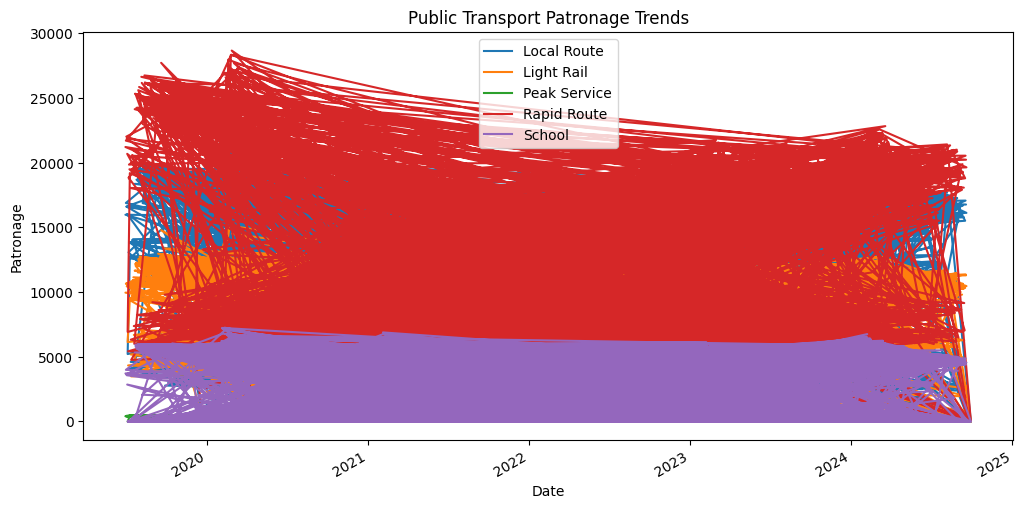

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df['Other'] = df['Other'].fillna(method='ffill')

# visualization
df[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']].plot(
    figsize=(12, 6),
    title="Public Transport Patronage Trends",
    xlabel="Date",
    ylabel="Patronage"
)
plt.show()


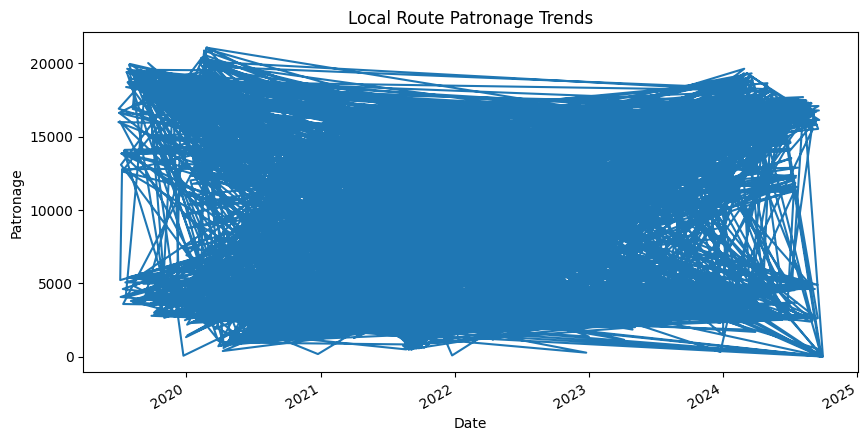

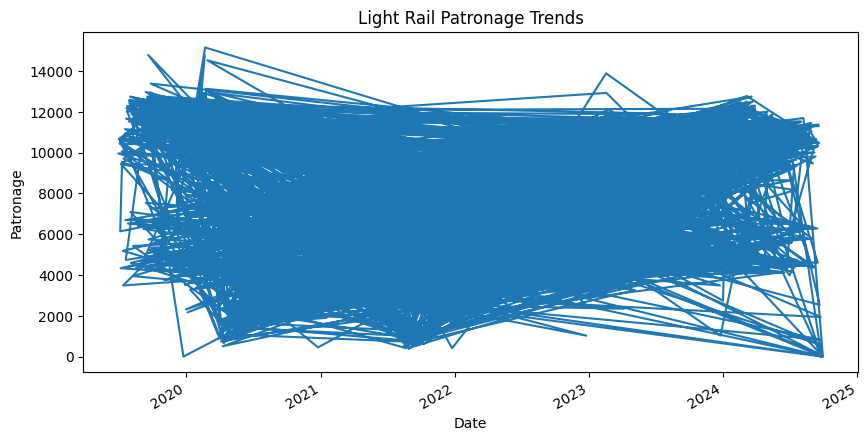

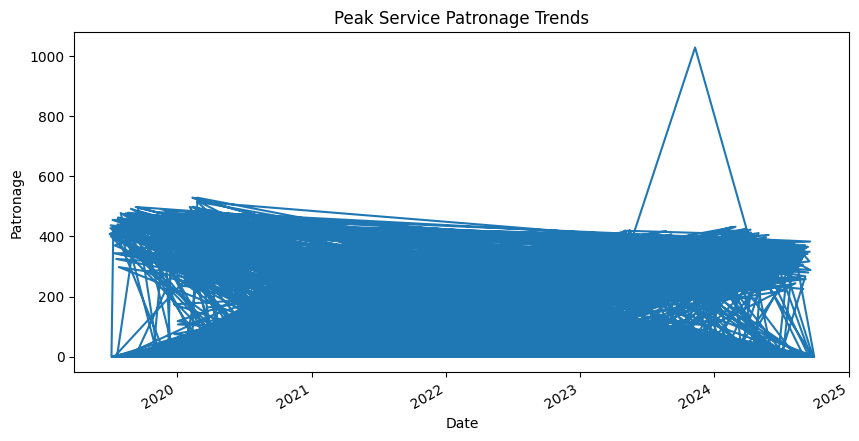

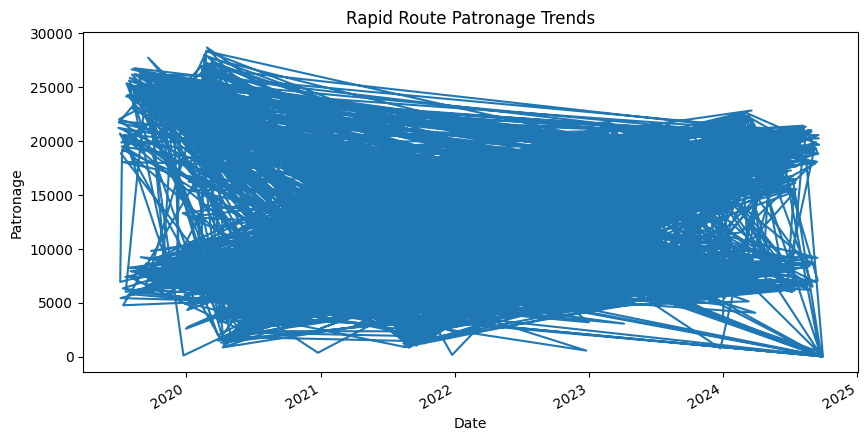

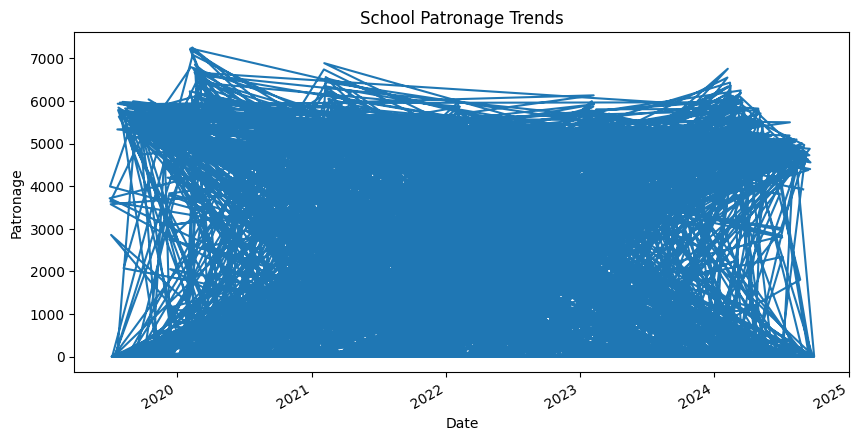

In [9]:
columns_to_plot = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']

# Create individual plots for each column
for column in columns_to_plot:
    plt.figure(figsize=(10, 5))
    df[column].plot(title=f"{column} Patronage Trends", xlabel="Date", ylabel="Patronage")
    plt.show()


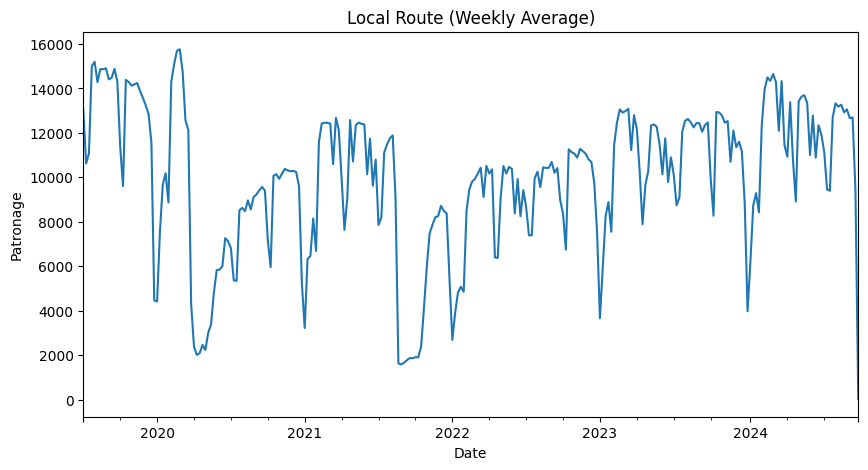

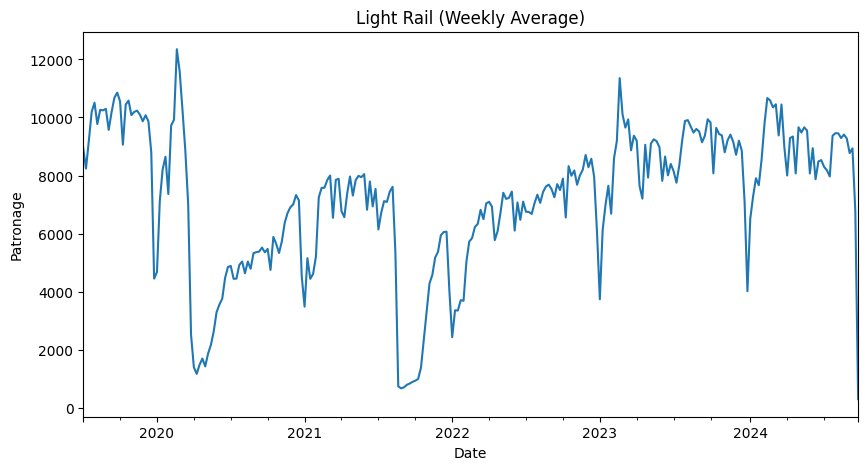

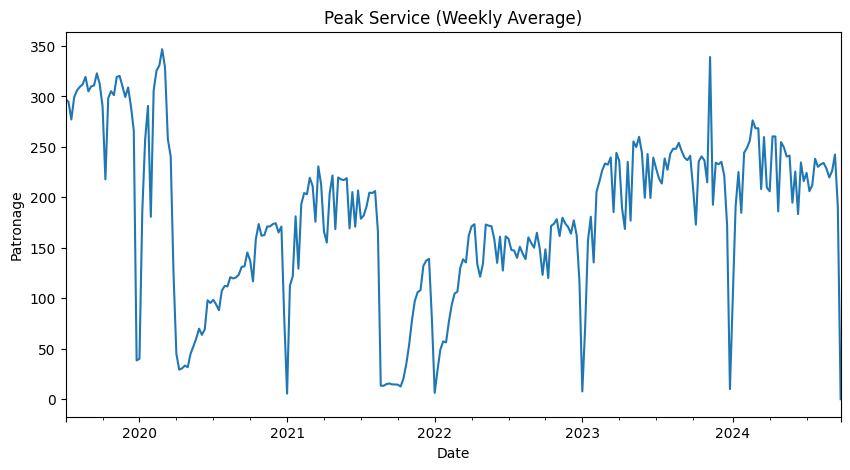

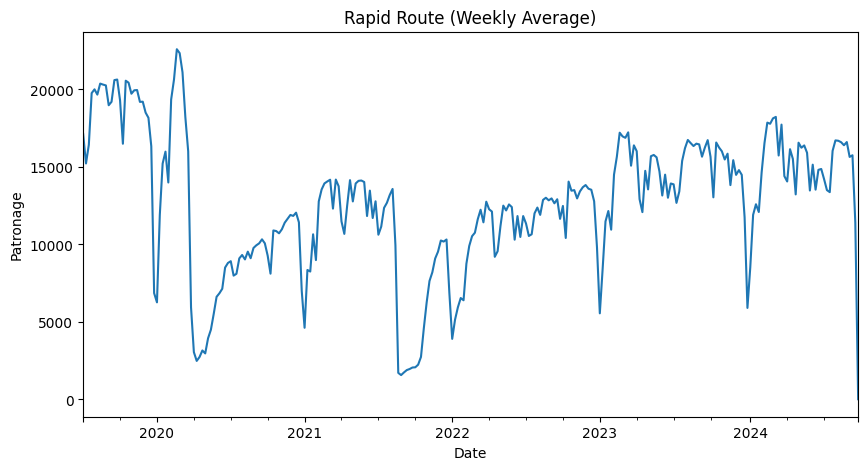

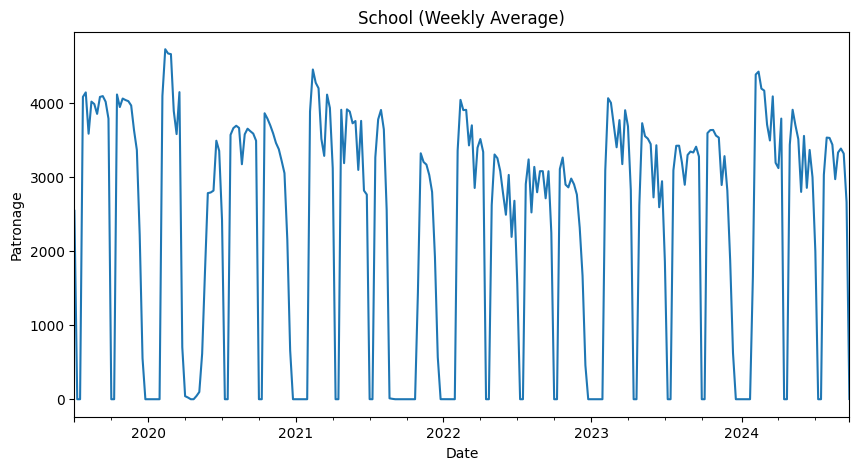

In [12]:
# Aggregate to weekly data
weekly_data = df.resample('W').mean()

# Plot each column with reduced density
for column in ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']:
    plt.figure(figsize=(10, 5))
    weekly_data[column].plot(title=f"{column} (Weekly Average)", xlabel="Date", ylabel="Patronage")
    plt.show()


In [13]:

filtered_data = df['2023']

for column in ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']:
    plt.figure(figsize=(10, 5))
    filtered_data[column].plot(title=f"{column} (2023 Trends)", xlabel="Date", ylabel="Patronage")
    plt.show()


KeyError: '2023'

In [14]:
print(df.index)
print(df.index.dtype)


DatetimeIndex(['2024-08-30', '2023-09-15', '2021-12-28', '2023-01-11',
               '2021-09-11', '2020-01-31', '2023-03-01', '2021-07-17',
               '2023-03-07', '2020-11-12',
               ...
               '2023-07-13', '2021-09-24', '2024-04-14', '2022-11-14',
               '2020-09-28', '2023-01-19', '2023-08-16', '2022-01-10',
               '2020-05-04', '2023-07-26'],
              dtype='datetime64[ns]', name='Date', length=1918, freq=None)
datetime64[ns]


In [17]:
# Sort the DataFrame by the Date index
df.sort_index(inplace=True)


In [19]:
# Filter data for the year 2023
filtered_data = df.loc['2023-01-01':'2023-12-31']
print(filtered_data.head())


            Local Route  Light Rail  Peak Service  Rapid Route  School  Other
Date                                                                         
2023-01-01         1364        2406             0         3178       0    4.0
2023-01-02         2239        2842             0         4541       0   16.0
2023-01-03         8061        5998           100        10227       0   45.0
2023-01-04         8322        5964           140        10293       0   32.0
2023-01-05         8541        7632           141        11050       0   42.0


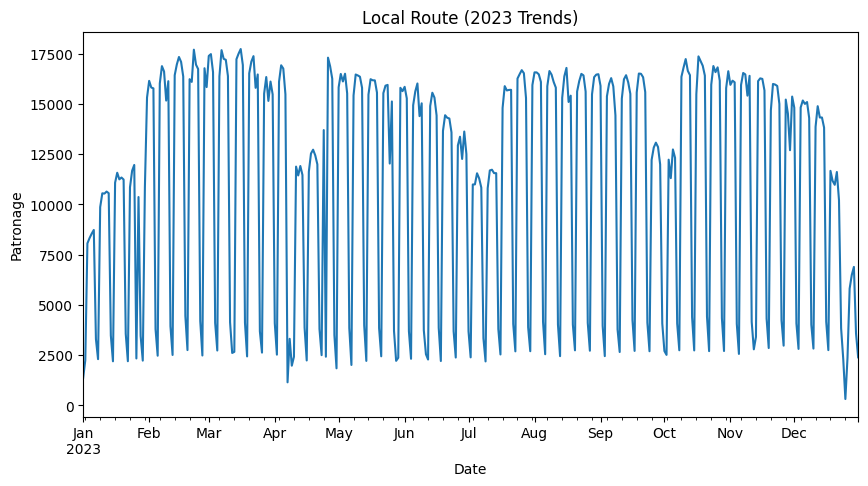

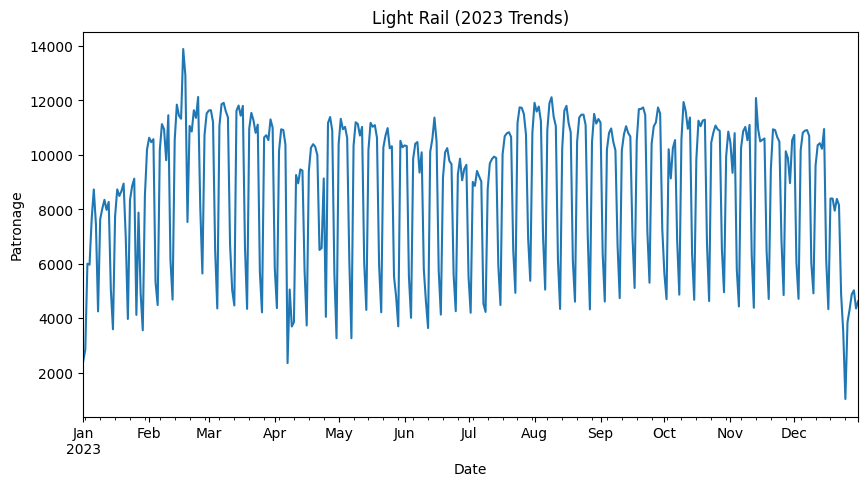

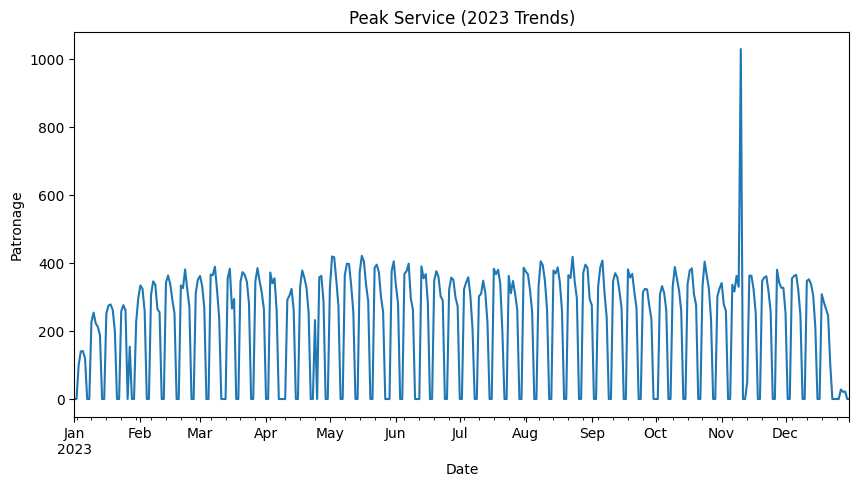

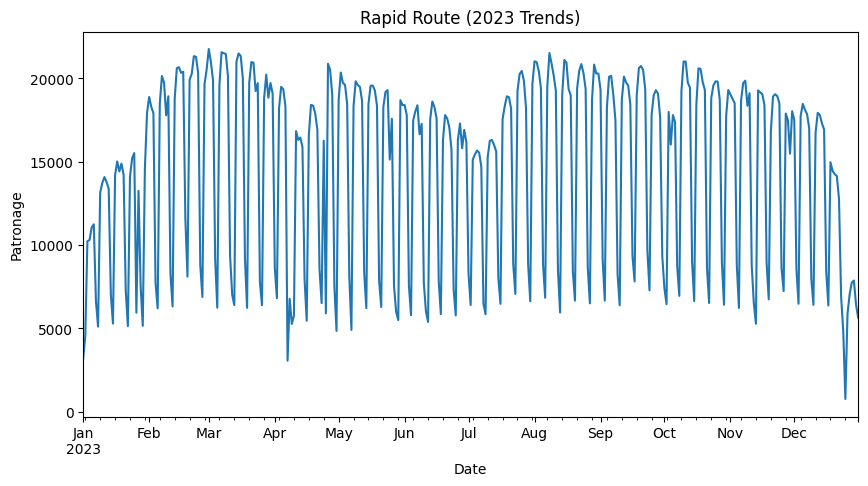

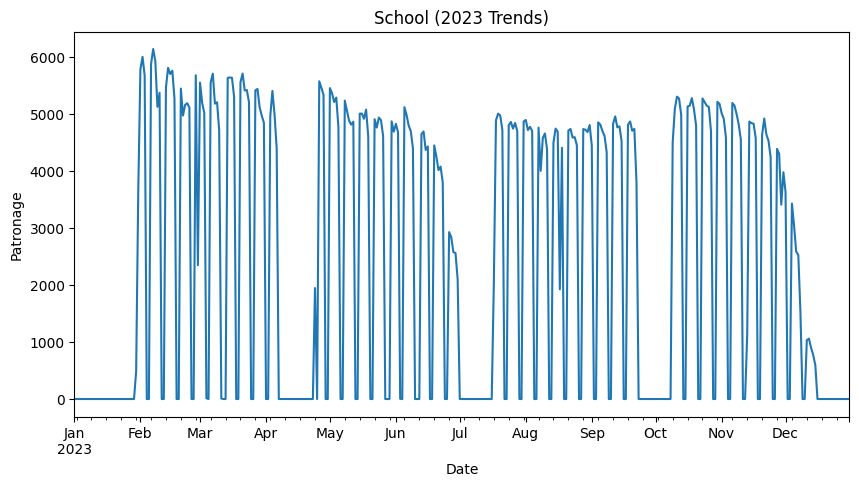

In [20]:
# Plot each column for the filtered year
for column in ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']:
    plt.figure(figsize=(10, 5))
    filtered_data[column].plot(title=f"{column} (2023 Trends)", xlabel="Date", ylabel="Patronage")
    plt.show()

In [21]:
# Filter data for the year 2023
filtered_data2 = df.loc['2024-01-01':'2024-12-31']
print(filtered_data2.head())

            Local Route  Light Rail  Peak Service  Rapid Route  School  Other
Date                                                                         
2024-01-01         1481        2740             0         3308       0    6.0
2024-01-02         8080        5927           182        10283       0   41.0
2024-01-03         9006        6499           196        11081       0   46.0
2024-01-04         8856        7678           175        10983       0   48.0
2024-01-05         9662        9746           146        11635       0  116.0


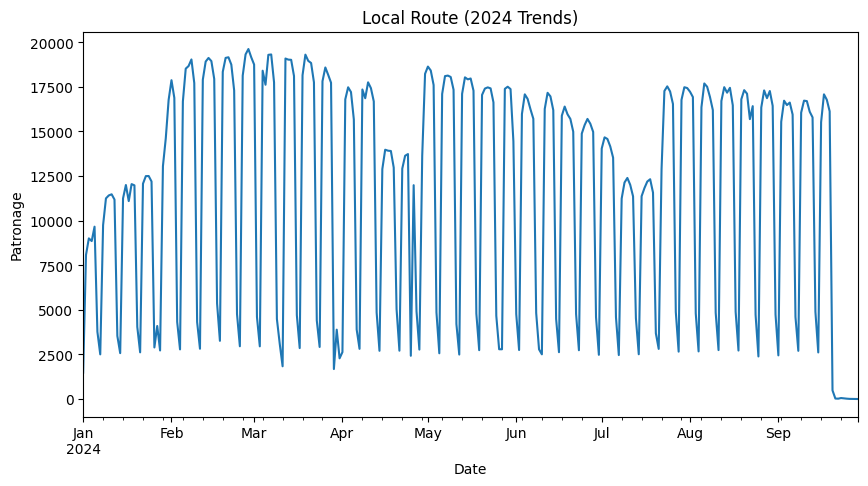

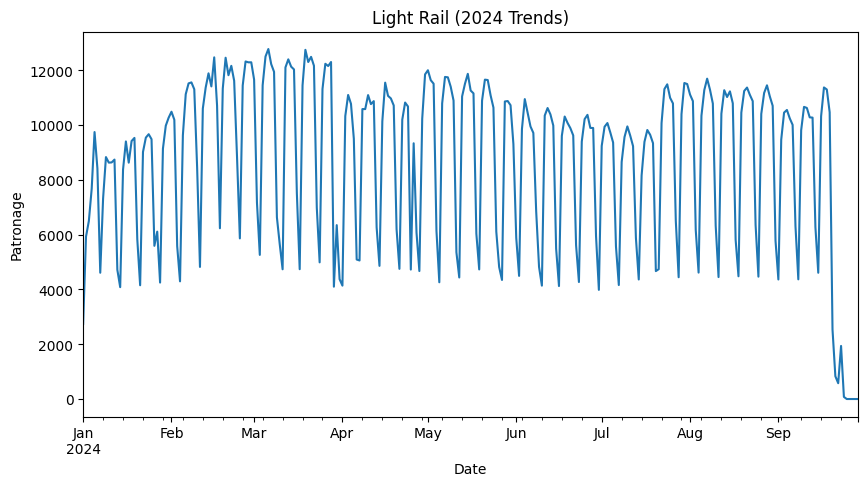

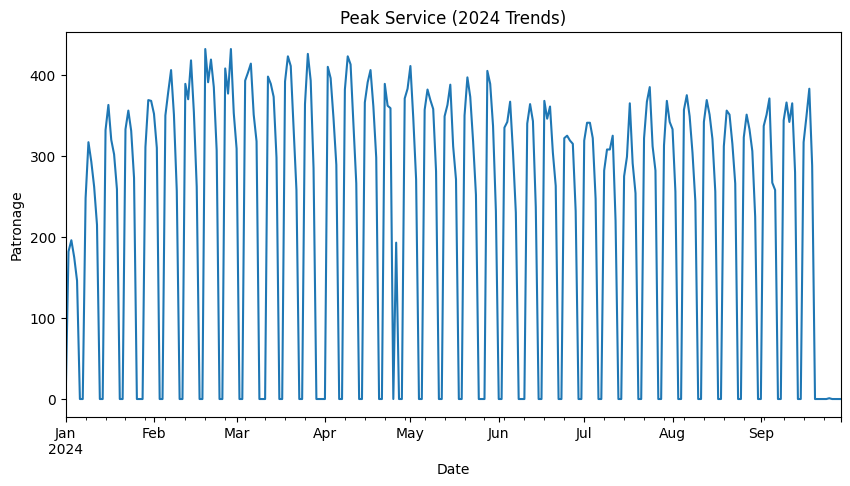

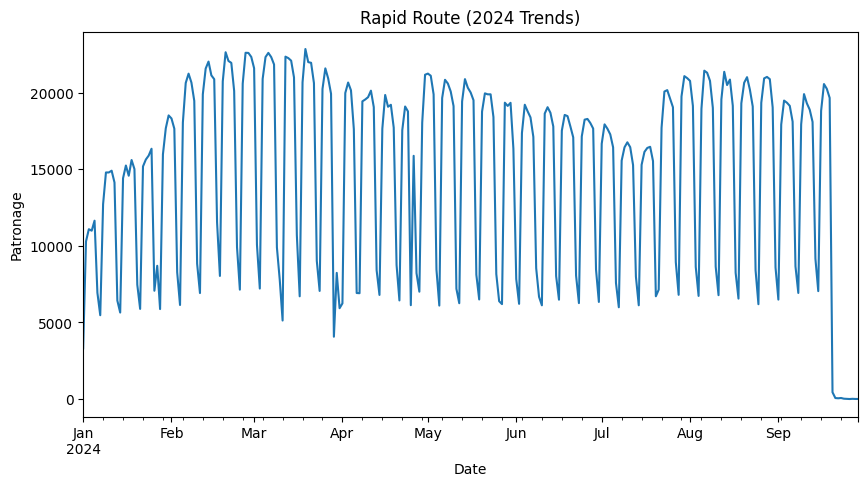

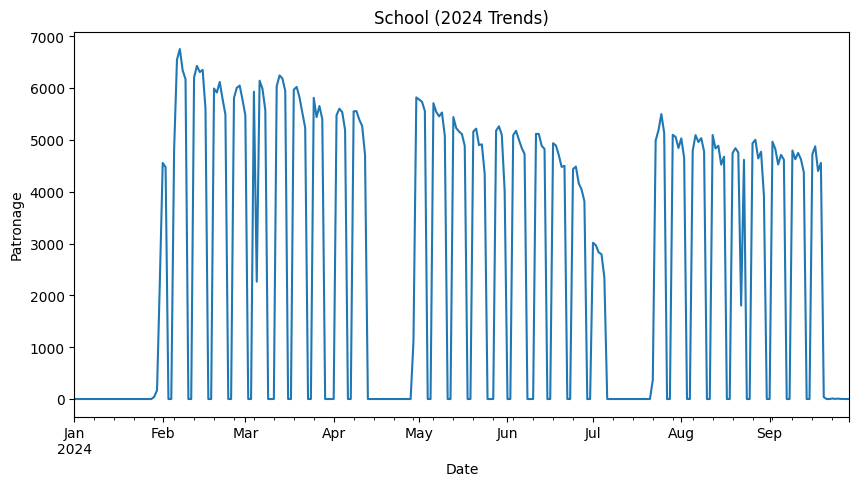

In [23]:
# Plot each column for the filtered year
for column in ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']:
    plt.figure(figsize=(10, 5))
    filtered_data2[column].plot(title=f"{column} (2024 Trends)", xlabel="Date", ylabel="Patronage")
    plt.show()

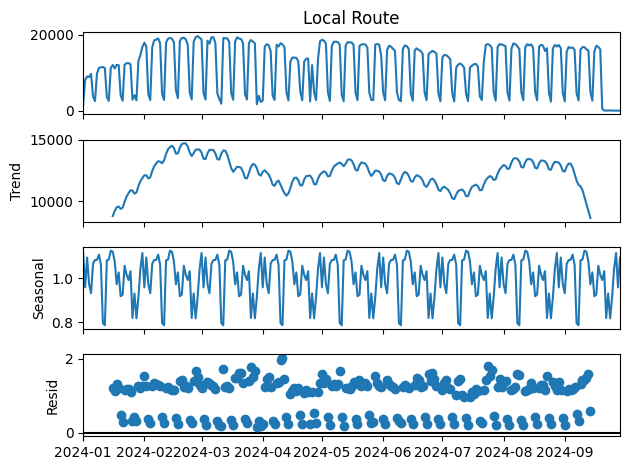

In [25]:
result = seasonal_decompose(filtered_data2['Local Route'], model='multiplicative', period=30)

# Plot the decomposition components
result.plot()
plt.show()


2years filtered data

In [26]:
filtered_df = df['2022-09-01':'2024-09-30']

# Check the first few rows of the filtered data
print(filtered_df.head())


            Local Route  Light Rail  Peak Service  Rapid Route  School  Other
Date                                                                         
2022-09-01        14390        9107           221        16216    4235   38.0
2022-09-02        13829        9212           152        15371    4291   53.0
2022-09-03         3400        5289             0         7369       0   24.0
2022-09-04         2078        3802             0         5329       0   21.0
2022-09-05        13358        8597           246        14853    4479   81.0


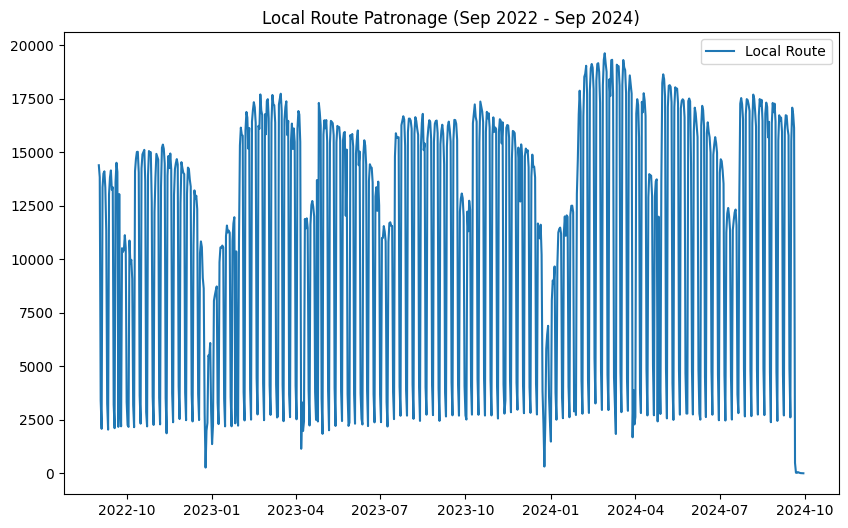

In [27]:
# Plot the filtered data for 'Local Route' as an example
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Local Route'], label='Local Route')
plt.title('Local Route Patronage (Sep 2022 - Sep 2024)')
plt.legend()
plt.show()


Key insights

Local Route     0
Light Rail      0
Peak Service    0
Rapid Route     0
School          0
Other           0
dtype: int64
0
        Local Route    Light Rail  Peak Service   Rapid Route       School  \
count    760.000000    760.000000    760.000000    760.000000   760.000000   
mean   11050.826316   8540.522368    206.646053  14301.217105  2429.222368   
std     5996.751981   2842.772779    157.833795   5836.307836  2433.694980   
min        1.000000      0.000000      0.000000      0.000000     0.000000   
25%     4009.000000   5926.500000      0.000000   8034.750000     0.000000   
50%    13554.500000   9606.500000    261.000000  16389.500000  2181.000000   
75%    16229.250000  10823.500000    342.000000  19207.000000  4826.000000   
max    19621.000000  13887.000000   1029.000000  22837.000000  6756.000000   

            Other  
count  760.000000  
mean    59.111842  
std     32.551844  
min      0.000000  
25%     24.000000  
50%     63.500000  
75%     80.000000  
max    176.000

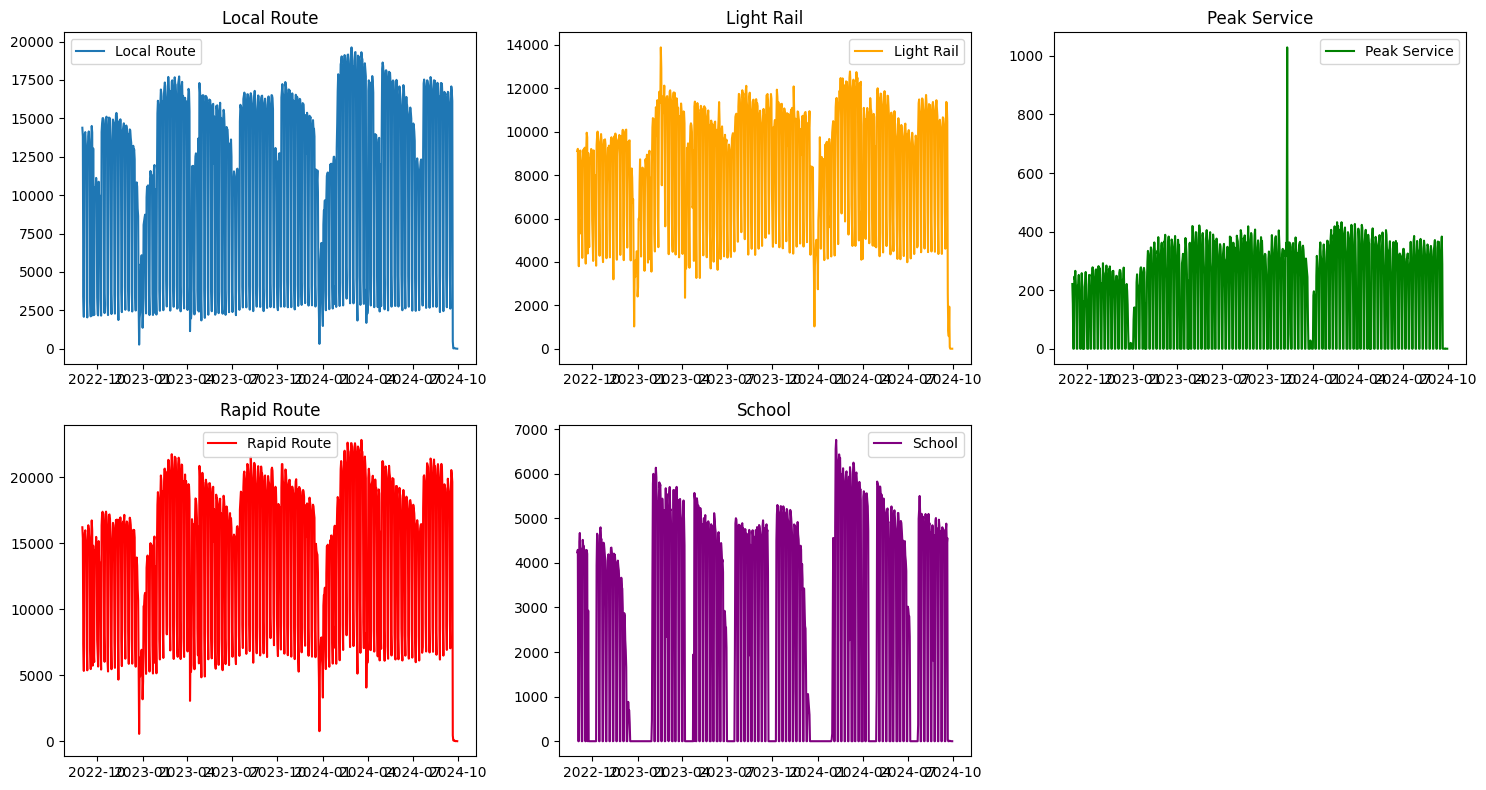

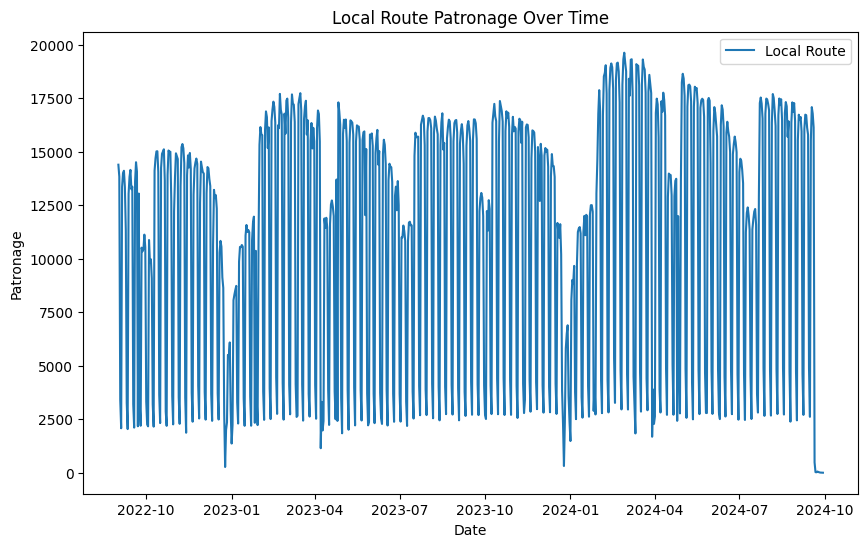

<ipython-input-33-75a803c8c405>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Month'] = filtered_df.index.month
<ipython-input-33-75a803c8c405>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Weekday'] = filtered_df.index.weekday


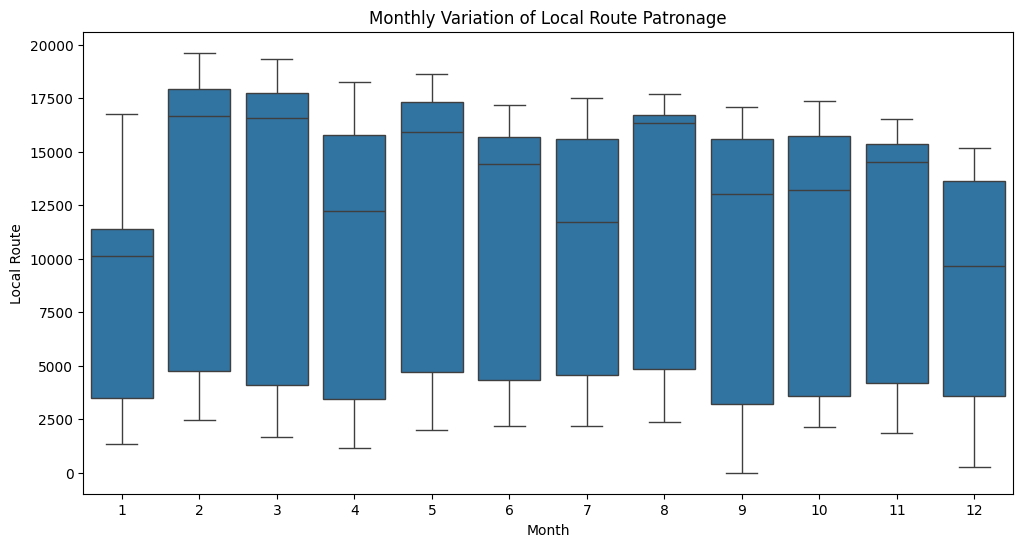

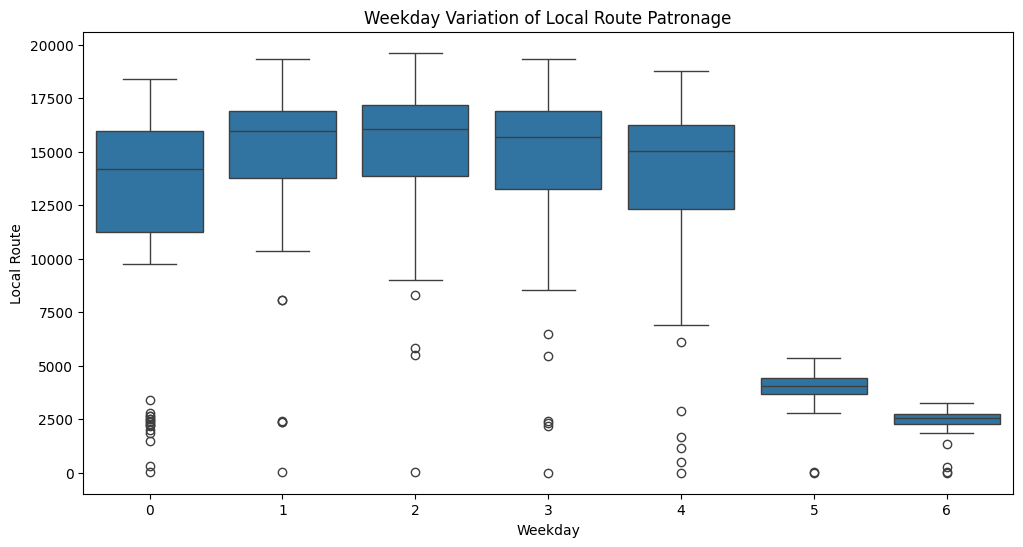

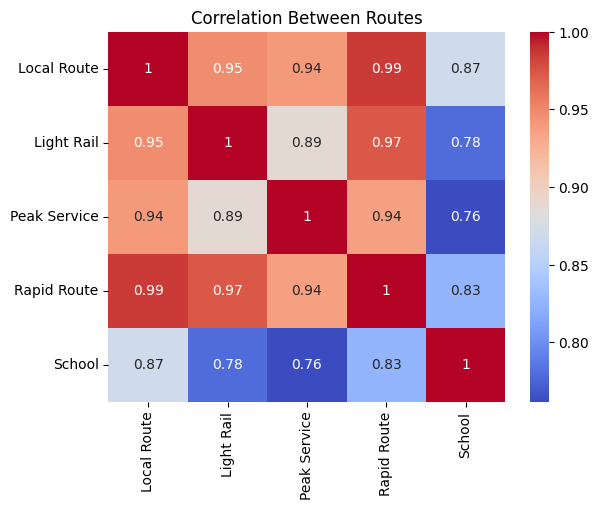

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for any missing values or duplicates in filtered data
print(filtered_df.isnull().sum())  # Missing values
print(filtered_df.duplicated().sum())  # Duplicate rows

# Descriptive statistics for all columns in filtered data
print(filtered_df.describe())

# Visualizing trends for all routes
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
plt.plot(filtered_df['Local Route'], label='Local Route')
plt.title('Local Route')
plt.legend()

plt.subplot(2, 3, 2)
plt.plot(filtered_df['Light Rail'], label='Light Rail', color='orange')
plt.title('Light Rail')
plt.legend()

plt.subplot(2, 3, 3)
plt.plot(filtered_df['Peak Service'], label='Peak Service', color='green')
plt.title('Peak Service')
plt.legend()

plt.subplot(2, 3, 4)
plt.plot(filtered_df['Rapid Route'], label='Rapid Route', color='red')
plt.title('Rapid Route')
plt.legend()

plt.subplot(2, 3, 5)
plt.plot(filtered_df['School'], label='School', color='purple')
plt.title('School')
plt.legend()

plt.tight_layout()
plt.show()

# Check for seasonality - visual inspection
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Local Route'], label='Local Route')
plt.title('Local Route Patronage Over Time')
plt.xlabel('Date')
plt.ylabel('Patronage')
plt.legend()
plt.show()

# Visualize monthly or weekly patterns
filtered_df['Month'] = filtered_df.index.month
filtered_df['Weekday'] = filtered_df.index.weekday

# Plot average patronage by month for each route
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Local Route', data=filtered_df)
plt.title('Monthly Variation of Local Route Patronage')
plt.show()

# Plot average patronage by weekday for each route
plt.figure(figsize=(12, 6))
sns.boxplot(x='Weekday', y='Local Route', data=filtered_df)
plt.title('Weekday Variation of Local Route Patronage')
plt.show()

# Look for correlations between routes
correlation_matrix = filtered_df[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Routes')
plt.show()


Outliers detected based on IQR:
Local Route     0
Light Rail      0
Peak Service    1
Rapid Route     0
School          0
dtype: int64


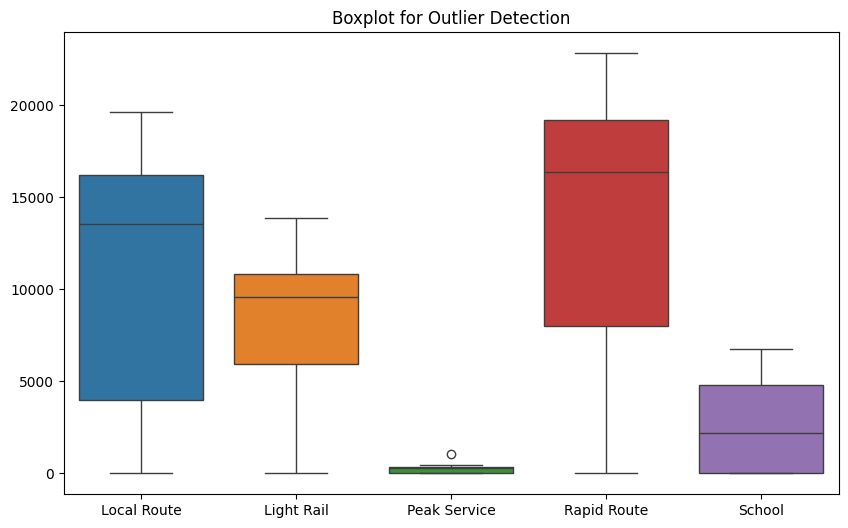

Rows with Z-score > 3 (outliers detected):
            Local Route  Light Rail  Peak Service  Rapid Route  School  Other  \
Date                                                                            
2023-11-10        16397       11100          1029        19102    4550   81.0   
2024-09-25           21           0             1           10       8   67.0   
2024-09-26            9           0             0            0       2   16.0   
2024-09-27            6           0             0           13       0    1.0   
2024-09-28            1           0             0            4       0   87.0   
2024-09-29            1           0             0            3       0   76.0   

            Month  Weekday  
Date                        
2023-11-10     11        4  
2024-09-25      9        2  
2024-09-26      9        3  
2024-09-27      9        4  
2024-09-28      9        5  
2024-09-29      9        6  


In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the Z-scores
from scipy.stats import zscore
z_scores = np.abs(zscore(filtered_df[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']]))

# Identify rows with Z-scores > 3 (i.e., potential outliers)
outliers_z = (z_scores > 3)

# Box plot method to detect outliers using IQR
Q1 = filtered_df[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']].quantile(0.25)
Q3 = filtered_df[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers_iqr = (filtered_df[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']] < lower_bound) | (filtered_df[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']] > upper_bound)

# Display outliers using IQR
print(f"Outliers detected based on IQR:\n{outliers_iqr.sum()}")

# Boxplots to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']])
plt.title("Boxplot for Outlier Detection")
plt.show()

# Show a few rows with potential outliers based on Z-scores
outliers_z_rows = filtered_df[(z_scores > 3).any(axis=1)]
print("Rows with Z-score > 3 (outliers detected):")
print(outliers_z_rows)


In [38]:
from scipy.stats import zscore

# Recalculate Z-scores for each route
z_scores = zscore(filtered_df[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']])

# Check if any Z-scores are greater than 3 for each route
outliers_zscore = (z_scores > 3).sum(axis=0)
print("Outliers detected based on Z-scores > 3:\n", outliers_zscore)

# Extract rows with Z-scores > 3 (outliers)
outliers_rows_zscore = filtered_df[(z_scores > 3).any(axis=1)]
print("Rows with Z-scores > 3 (outliers detected):\n", outliers_rows_zscore)


Outliers detected based on Z-scores > 3:
 Local Route     0
Light Rail      0
Peak Service    1
Rapid Route     0
School          0
dtype: int64
Rows with Z-scores > 3 (outliers detected):
             Local Route  Light Rail  Peak Service  Rapid Route  School  Other  \
Date                                                                            
2023-11-10        16397       11100          1029        19102    4550   81.0   

            Month  Weekday  
Date                        
2023-11-10     11        4  


remove outlier

In [40]:
filtered_df = filtered_df[(z_scores <= 3).all(axis=1)]
print("Shape of dataset after removing outliers:", filtered_df.shape)


Shape of dataset after removing outliers: (759, 8)


<ipython-input-40-c27a28017f7e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(z_scores <= 3).all(axis=1)]


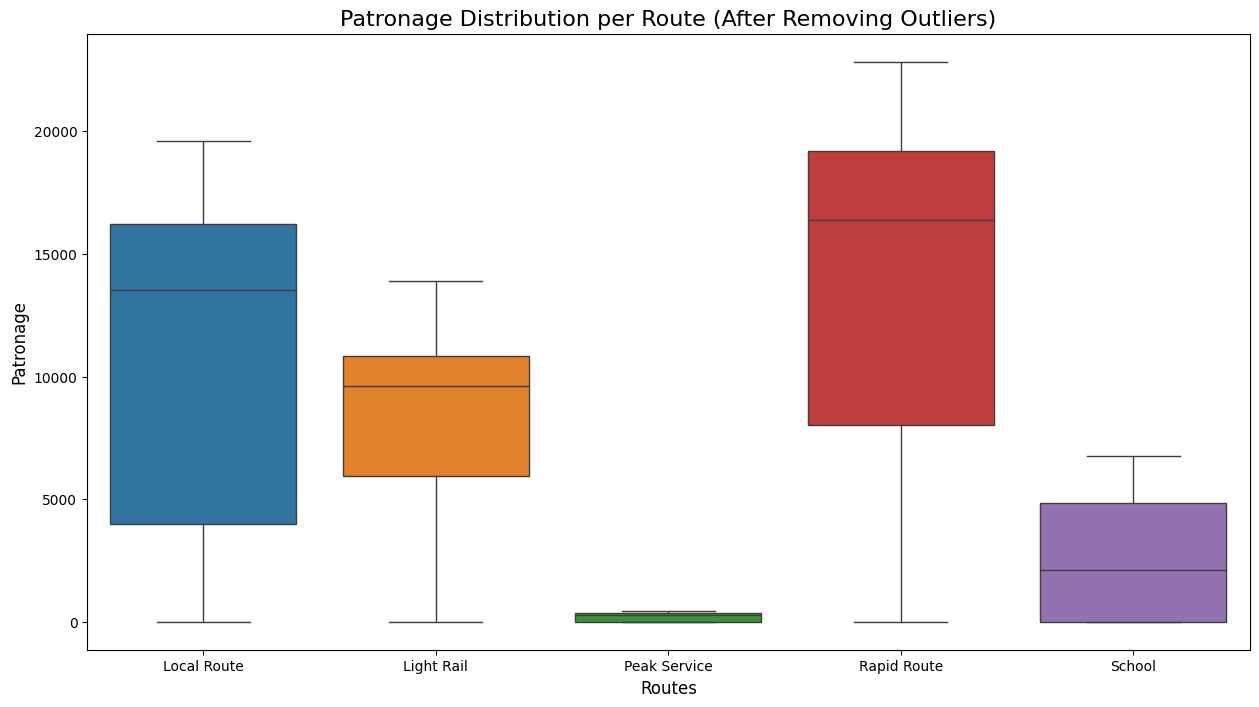

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplot for each route's patronage after removing outliers
plt.figure(figsize=(15, 8))

# Create a boxplot for each route
sns.boxplot(data=filtered_df[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']])

# Adding labels and title
plt.title('Patronage Distribution per Route (After Removing Outliers)', fontsize=16)
plt.xlabel('Routes', fontsize=12)
plt.ylabel('Patronage', fontsize=12)

# Show the plot
plt.show()


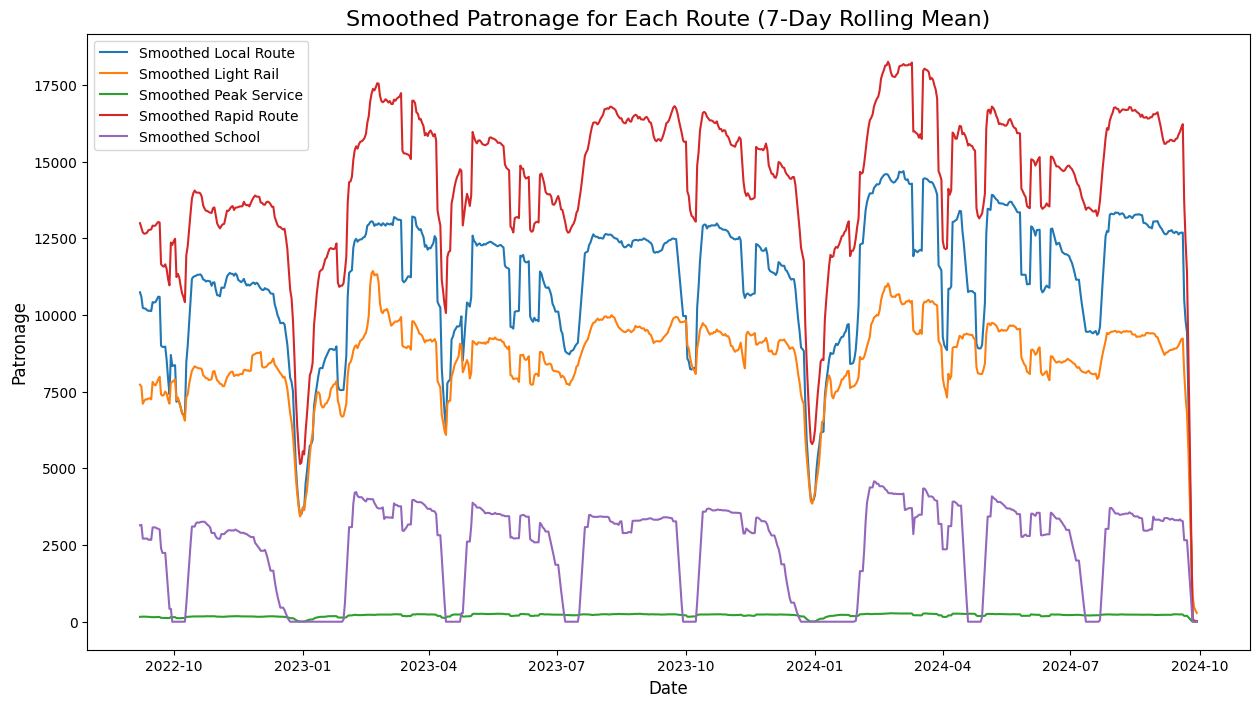

In [42]:

filtered_df_smooth = filtered_df.copy()
window_size = 7  # You can adjust this to smooth over a different period

# Apply rolling mean
for route in ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']:
    filtered_df_smooth[route] = filtered_df[route].rolling(window=window_size).mean()

# Plot the smoothed data
plt.figure(figsize=(15, 8))

# Plot for each route
for route in ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']:
    plt.plot(filtered_df_smooth.index, filtered_df_smooth[route], label=f'Smoothed {route}')

plt.title('Smoothed Patronage for Each Route (7-Day Rolling Mean)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Patronage', fontsize=12)
plt.legend()
plt.show()


In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for August 2024
zoomed_in_data_2 = filtered_df_smooth.loc['2023-07-01':'2023-10-31']

# Check the filtered data
print(zoomed_in_data.head())


            Local Route   Light Rail  Peak Service   Rapid Route  School  \
Date                                                                       
2023-10-01  9963.142857  9827.714286    210.000000  15651.428571     0.0   
2023-10-02  8576.571429  9012.000000    165.142857  14025.142857     0.0   
2023-10-03  8490.428571  8891.571429    162.714286  13880.142857     0.0   
2023-10-04  8238.142857  8597.714286    164.142857  13414.428571     0.0   
2023-10-05  8220.571429  8386.000000    169.428571  13231.428571     0.0   

            Other  Month  Weekday  
Date                               
2023-10-01   21.0     10        6  
2023-10-02   20.0     10        0  
2023-10-03   63.0     10        1  
2023-10-04   64.0     10        2  
2023-10-05   54.0     10        3  


getting insight for a particular dip in smoothened plot

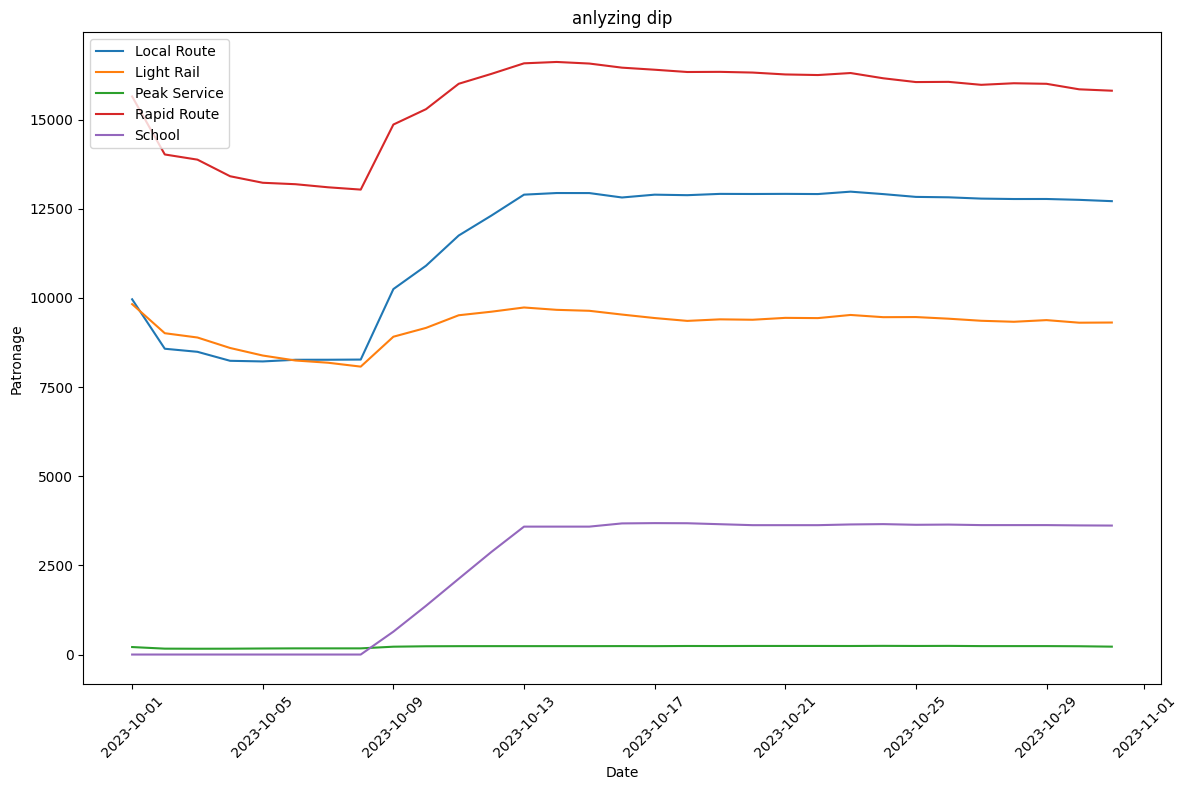

In [50]:
# List of routes to plot
routes = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']
plt.figure(figsize=(12, 8))
for route in routes:
    plt.plot(zoomed_in_data.index, zoomed_in_data[route], label=route)

plt.title('anlyzing dip')
plt.xlabel('Date')
plt.ylabel('Patronage')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


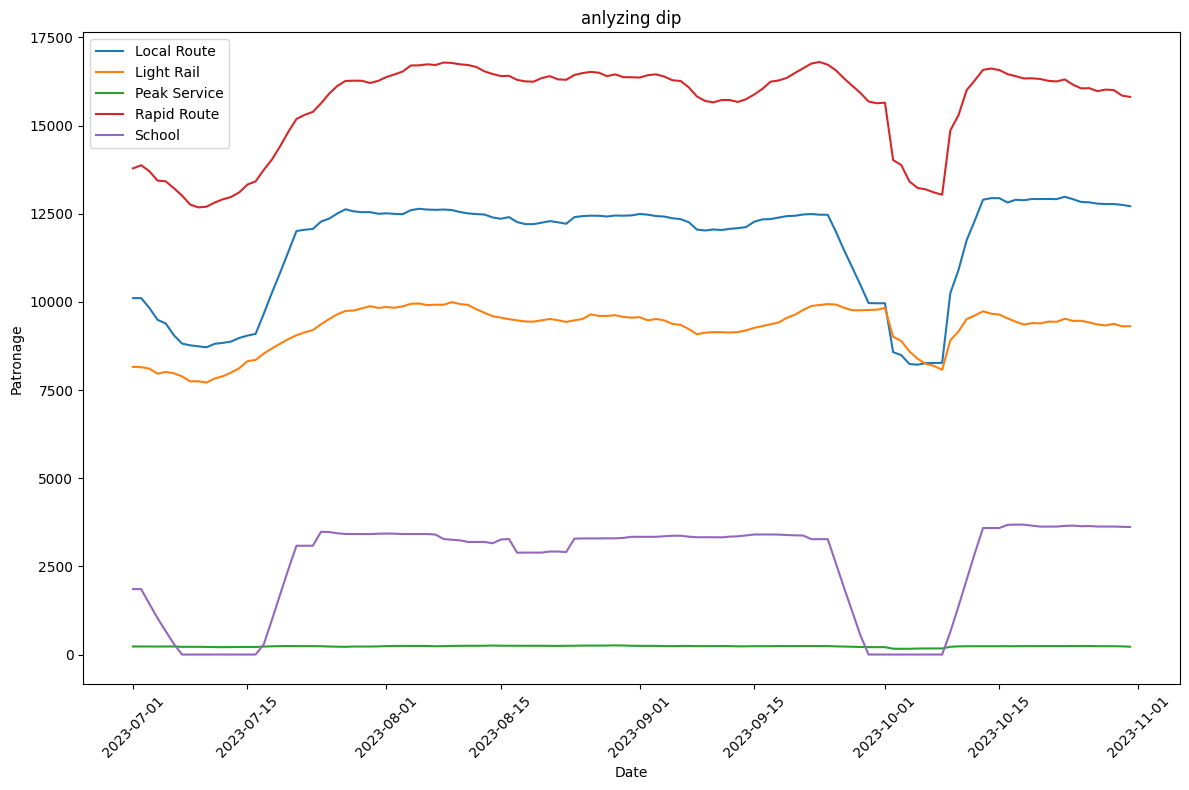

In [52]:
# List of routes to plot
routes = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']
plt.figure(figsize=(12, 8))
for route in routes:
    plt.plot(zoomed_in_data_2.index, zoomed_in_data_2[route], label=route)

plt.title('anlyzing dip')
plt.xlabel('Date')
plt.ylabel('Patronage')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


During october 2023 from dates 1 to 8 there is a probable dip insights from the smoothenened graph on all kind of services


fetaure extraction

In [54]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming 'filtered_df_smooth' is your dataframe

# 1. Feature Transformation: Scaling numerical features
scaler = StandardScaler()

# List of numerical columns to scale
numerical_cols = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']

# Apply scaling to numerical columns
filtered_df_smooth[numerical_cols] = scaler.fit_transform(filtered_df_smooth[numerical_cols])

# 2. Feature Creation: Day of the Week and Weekend Indicator
# Assuming 'Weekday' is from 0 (Monday) to 6 (Sunday)
filtered_df_smooth['Day of Week'] = filtered_df_smooth['Weekday'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})
filtered_df_smooth['Is Weekend'] = filtered_df_smooth['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

# 3. Feature Creation: Extract Month
filtered_df_smooth['Month'] = filtered_df_smooth['Month'].astype(str).apply(lambda x: 'Month_' + x)

# 4. Feature Creation: Rolling Averages (Moving Averages)

rolling_window = 7
filtered_df_smooth['Local Route 7-Day MA'] = filtered_df_smooth['Local Route'].rolling(window=rolling_window).mean()
filtered_df_smooth['Light Rail 7-Day MA'] = filtered_df_smooth['Light Rail'].rolling(window=rolling_window).mean()
filtered_df_smooth['Peak Service 7-Day MA'] = filtered_df_smooth['Peak Service'].rolling(window=rolling_window).mean()
filtered_df_smooth['Rapid Route 7-Day MA'] = filtered_df_smooth['Rapid Route'].rolling(window=rolling_window).mean()
filtered_df_smooth['School 7-Day MA'] = filtered_df_smooth['School'].rolling(window=rolling_window).mean()

# Drop rows with NaN values after rolling operation (first few rows will have NaNs due to the window size)
filtered_df_smooth = filtered_df_smooth.dropna(subset=['Local Route 7-Day MA', 'Light Rail 7-Day MA',
                                                      'Peak Service 7-Day MA', 'Rapid Route 7-Day MA',
                                                      'School 7-Day MA'])

# 5. Feature Creation: Lag Features (e.g., Previous month's data for routes)
# Ensure you're using .loc[] to assign new columns safely

# Lag features with proper indexing
filtered_df_smooth.loc[:, 'Local Route Lag 30'] = filtered_df_smooth['Local Route'].shift(30)
filtered_df_smooth.loc[:, 'Light Rail Lag 30'] = filtered_df_smooth['Light Rail'].shift(30)
filtered_df_smooth.loc[:, 'Peak Service Lag 30'] = filtered_df_smooth['Peak Service'].shift(30)
filtered_df_smooth.loc[:, 'Rapid Route Lag 30'] = filtered_df_smooth['Rapid Route'].shift(30)
filtered_df_smooth.loc[:, 'School Lag 30'] = filtered_df_smooth['School'].shift(30)

# Drop rows with NaN values resulting from the shift operation (lag)
filtered_df_smooth = filtered_df_smooth.dropna(subset=['Local Route Lag 30', 'Light Rail Lag 30',
                                                      'Peak Service Lag 30', 'Rapid Route Lag 30',
                                                      'School Lag 30'])

# Now you should be free from the SettingWithCopyWarning
print(filtered_df_smooth.head())


            Local Route  Light Rail  Peak Service  Rapid Route    School  \
Date                                                                       
2022-11-18    -0.053980   -0.404713     -0.716529    -0.359242  0.293257   
2022-11-19    -0.040288   -0.408243     -0.716529    -0.358251  0.293257   
2022-11-20    -0.008235   -0.314266     -0.716529    -0.301847  0.292862   
2022-11-21    -0.064374   -0.303778     -0.736557    -0.335194  0.271821   
2022-11-22    -0.102402   -0.327869     -0.730835    -0.346310  0.265499   

               Other           Month  Weekday Day of Week  Is Weekend  \
Date                                                                    
2022-11-18  0.017592  Month_Month_11        4      Friday           0   
2022-11-19 -0.841724  Month_Month_11        5    Saturday           1   
2022-11-20 -0.780344  Month_Month_11        6      Sunday           1   
2022-11-21  0.385870  Month_Month_11        0      Monday           0   
2022-11-22  1.367946  Month_M

In [55]:
filtered_df_smooth

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,Month,Weekday,Day of Week,Is Weekend,Local Route 7-Day MA,Light Rail 7-Day MA,Peak Service 7-Day MA,Rapid Route 7-Day MA,School 7-Day MA,Local Route Lag 30,Light Rail Lag 30,Peak Service Lag 30,Rapid Route Lag 30,School Lag 30
Date,,,,,,,,,,,,,,,,,,,,
2022-11-18,-0.053980,-0.404713,-0.716529,-0.359242,0.293257,0.017592,Month_Month_11,4,Friday,0,0.014029,-0.417915,-0.608215,-0.371395,0.334463,0.050208,-0.272106,-0.748002,-0.186892,0.520061
2022-11-19,-0.040288,-0.408243,-0.716529,-0.358251,0.293257,-0.841724,Month_Month_11,5,Saturday,1,-0.000686,-0.426238,-0.624565,-0.371780,0.326871,0.055871,-0.273975,-0.736557,-0.196907,0.534384
2022-11-20,-0.008235,-0.314266,-0.716529,-0.301847,0.292862,-0.780344,Month_Month_11,6,Sunday,1,-0.007123,-0.406137,-0.640914,-0.357103,0.319166,0.031536,-0.291213,-0.722251,-0.237628,0.543077
2022-11-21,-0.064374,-0.303778,-0.736557,-0.335194,0.271821,0.385870,Month_Month_11,0,Monday,0,-0.026142,-0.386881,-0.665847,-0.351176,0.305379,-0.016761,-0.435035,-0.722251,-0.346805,0.543077
2022-11-22,-0.102402,-0.327869,-0.730835,-0.346310,0.265499,1.367946,Month_Month_11,1,Tuesday,0,-0.047161,-0.373575,-0.689144,-0.347277,0.293807,-0.024790,-0.465460,-0.722251,-0.387141,0.543077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-25,-3.832936,-4.569209,-3.377372,-4.457449,-1.254264,0.232421,Month_Month_9,2,Wednesday,0,-1.339728,-1.772020,-1.094606,-1.660489,-0.210871,0.724503,0.560503,0.405030,0.744524,0.359737
2024-09-26,-4.836226,-5.656335,-4.201374,-5.538762,-1.704217,-1.332762,Month_Month_9,3,Thursday,0,-2.123422,-2.642338,-1.755116,-2.547819,-0.533747,0.723632,0.553026,0.390725,0.760042,0.375740
2024-09-27,-4.866039,-5.919783,-4.201374,-5.562260,-1.707872,-1.793110,Month_Month_9,4,Friday,0,-2.775303,-3.435531,-2.301181,-3.299834,-0.795887,0.708072,0.561541,0.339224,0.760978,0.364578


In [57]:
corr_matrix = filtered_df_smooth[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']].corr()
print(corr_matrix)


              Local Route  Light Rail  Peak Service  Rapid Route    School
Local Route      1.000000    0.929550      0.893815     0.966822  0.838199
Light Rail       0.929550    1.000000      0.892405     0.977993  0.675985
Peak Service     0.893815    0.892405      1.000000     0.919437  0.633491
Rapid Route      0.966822    0.977993      0.919437     1.000000  0.734984
School           0.838199    0.675985      0.633491     0.734984  1.000000


most of the correlation results from this matrix infers that all the services are linked to each on some aspects iin overall.

In [60]:
print(filtered_df_smooth.columns)


Index(['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School',
       'Other', 'Month', 'Weekday', 'Day of Week', 'Is Weekend',
       'Local Route 7-Day MA', 'Light Rail 7-Day MA', 'Peak Service 7-Day MA',
       'Rapid Route 7-Day MA', 'School 7-Day MA', 'Local Route Lag 30',
       'Light Rail Lag 30', 'Peak Service Lag 30', 'Rapid Route Lag 30',
       'School Lag 30'],
      dtype='object')


In [61]:
# Select features from df_filtered_smooth
X_local_route = filtered_df_smooth[['Light Rail', 'Peak Service', 'Rapid Route', 'School',
                                   'Local Route 7-Day MA', 'Local Route Lag 30']]

# Split data into training and testing sets
train_size = int(len(filtered_df_smooth) * 0.8)
train, test = filtered_df_smooth.iloc[:train_size], filtered_df_smooth.iloc[train_size:]

X_train_local_route, X_test_local_route = X_local_route.iloc[:train_size], X_local_route.iloc[train_size:]
y_train_local_route, y_test_local_route = filtered_df_smooth['Local Route'].iloc[:train_size], filtered_df_smooth['Local Route'].iloc[train_size:]


Model building

In [68]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define your features (X) and target variable (y)
X = ['Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Local Route 7-Day MA', 'Local Route Lag 30']

X_train = train[X]
y_train = train['Local Route'].values

X_train = X_train.values

# Fit SARIMAX model
model = SARIMAX(y_train, exog=X_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))  # Tune parameters
model_fit = model.fit()

# Forecast
forecast = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, exog=test[X].values)

# Evaluate model (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Local Route'], forecast))
print(f"RMSE: {rmse}")


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE: 0.20016904207503014


In [76]:
print(train[X].dtypes)


Light Rail              float64
Peak Service            float64
Month                    object
Is Weekend                int64
Local Route 7-Day MA    float64
dtype: object


In [77]:
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
train['Month'] = train['Month'].map(month_map)


<ipython-input-77-ead62bdfdf9b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Month'] = train['Month'].map(month_map)


In [78]:
for col in X:
    train[col] = pd.to_numeric(train[col], errors='coerce')


<ipython-input-78-609d8ab7b097>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = pd.to_numeric(train[col], errors='coerce')


In [79]:
train = train.dropna(subset=X)  # Drop rows with NaN values in X
